## Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical
models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of
result statistics are available for each estimator. The results are tested against existing statistical packages
to ensure that they are correct.

The online documentation is hosted at statsmodels.org.

In [1]:
# Library imports
from statsmodels.tsa.filters.hp_filter import hpfilter
import pandas as pd

import matplotlib.pyplot as plt

"""
The Dataset used in this exercise is US Macroeconomic Data for 1959Q1 - 2009Q3

Number of Observations - 203
Number of Variables - 14
Variable name definitions:

    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)
"""

### Data load

In [3]:
df = pd.read_csv("D://ML-Datasets//Udemy-TimeSeries//macrodata.csv", 
                index_col=0, parse_dates=True)

df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
# Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 203 entries, 1959-03-31 to 2009-09-30
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 23.8 KB


### Data Exploration

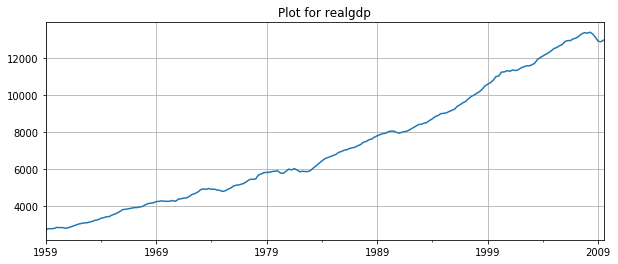

In [5]:
# If we plot the realgdp column
df['realgdp'].plot(figsize=(10, 4), title='Plot for realgdp', grid=True)

In [6]:
## To get the trend for realgdp
# We use tuple unpacking here to get cyclical component and trend component
# We use lamb = 1600, because of quarterly data
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

# to see the type of component - both are pandas series
print(type(gdp_cycle))
print(type(gdp_trend))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
# to check the first few values of trend
gdp_trend.head()

1959-03-31    2670.837085
1959-06-30    2698.712468
1959-09-30    2726.612545
1959-12-31    2754.612067
1960-03-31    2782.816333
Name: realgdp_trend, dtype: float64

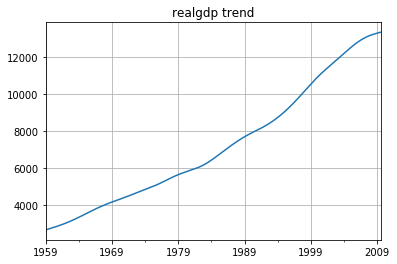

In [8]:
# Plot the trend
gdp_trend.plot(title='realgdp trend', grid=True)

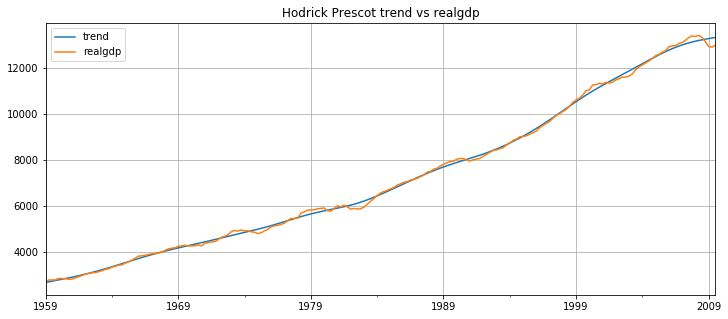

In [9]:
# we will plot this gdp_trend against realgdp
df['trend'] = gdp_trend
df[['trend', 'realgdp']].plot(figsize=(12, 5), title='Hodrick Prescot trend vs realgdp', grid=True).autoscale(axis='x', 
                                                                                                  tight=True)

On a long run they seem to overlap but there are many years where the real value seem to be above or below the
general trend... If we need to zoom in to a particular year (everything after 2005)

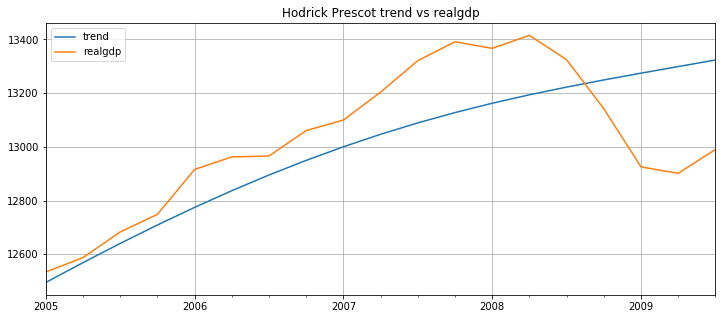

In [10]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12, 5), title='Hodrick Prescot trend vs realgdp', grid=True).autoscale(
            axis='x', tight=True)

Hence we see that realgdp is much more fluctuating than trend in this period